In [2]:
import pandas as pd

df=pd.read_csv("d:/data/ozone/ozone2.csv")
df.columns

Index(['Solar.R', 'Wind', 'Temp', 'Ozone', 'Result'], dtype='object')

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

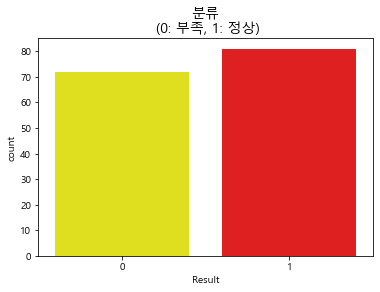

In [3]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc

font_name=font_manager.FontProperties(fname="c:/windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

colors=['yellow','red']

sns.countplot('Result', data=df, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

In [4]:
cols=['Solar.R','Wind','Temp']
X=df[cols]
y=df['Result']

array([[<AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Temp', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Ozone', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Result', ylabel='Solar.R'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Temp', ylabel='Wind'>,
        <AxesSubplot:xlabel='Ozone', ylabel='Wind'>,
        <AxesSubplot:xlabel='Result', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Temp'>,
        <AxesSubplot:xlabel='Wind', ylabel='Temp'>,
        <AxesSubplot:xlabel='Temp', ylabel='Temp'>,
        <AxesSubplot:xlabel='Ozone', ylabel='Temp'>,
        <AxesSubplot:xlabel='Result', ylabel='Temp'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Wind', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Temp', ylabel='Ozone'>,
        <AxesSubplot:x

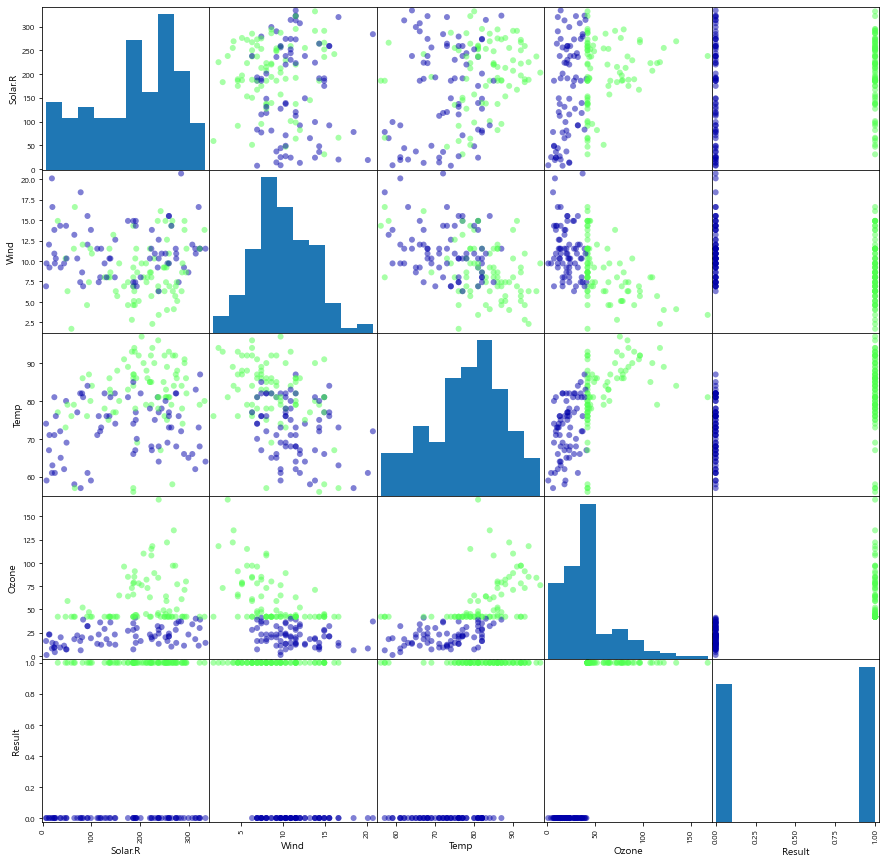

In [5]:
import mglearn

pd.plotting.scatter_matrix(df, c=y, figsize=(15,15), marker='o', cmap=mglearn.cm3)

In [6]:
from imblearn.under_sampling import RandomUnderSampler

X_sample, y_sample=RandomUnderSampler(random_state=0).fit_resample(X,y)

X_samp=pd.DataFrame(data=X_sample, columns=cols)
y_samp=pd.DataFrame(data=y_sample, columns=['Result'])
df_samp=pd.concat([X_samp, y_samp], axis=1)

In [7]:
df_samp['Result'].value_counts()

0    72
1    72
Name: Result, dtype: int64

D:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: 부족, 1: 정상)')

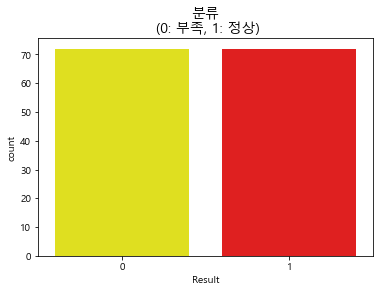

In [8]:
sns.countplot('Result', data=df_samp, palette=colors)
plt.title('분류\n (0: 부족, 1: 정상)', fontsize=14)

In [9]:
X=X_samp[cols]
y=y_samp['Result']

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, stratify=y, random_state=10)

Text(0.5, 0, 'number of clusters')

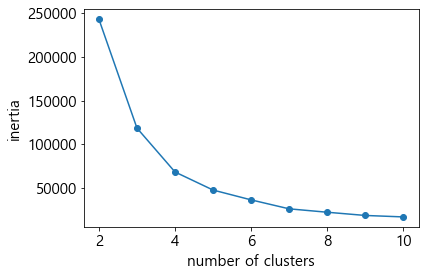

In [11]:
# 최적의 클러스터 개수를 구하는 방법
# inertia value : 군집화가 된 후 각 중심점에서 군집의 데이터 간의 거리를 합산한 값. 작을수록 응집도가 높은 군집
from sklearn.cluster import KMeans

clusters=range(2,11)
inertias=[]

for n in clusters:
    # 모델 생성
    model=KMeans(n_clusters=n, random_state=10)
    model.fit(X_train)
    inertias.append(model.inertia_)

plt.rcParams["font.size"]=15
plt.plot(clusters, inertias, '-o')
plt.ylabel('inertia')
plt.xlabel('number of clusters')
# 엘보우(elbow) 기법
# inertias 값이 하강하다가 팔꿈치처럼 꺾이는 부분 3
# 따라서 3개의 클러스터로 분류하는 것이 적절함

In [12]:
model=KMeans(n_clusters=3, random_state=10)
print(model)
pred=model.fit_predict(X_train)
print(pred[:5])
pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=3, random_state=10)
[1 2 0 1 1]
[0 0 1 1 2]


In [13]:
# 군집화에서는 개별 라벨값보다는 군집이 중요함
# 실루엣 값은 한 클러스터 안의 데이터들이 다른 클러스터와 비교해서 얼마나 비슷한가를 나타냄
# a_i : i와 같은 군집에 속한 원소들의 평균 거리
# b_i : i와 다른 군집 중 가장 가까운 군집까지의 평균 거리
# (b_i - a_i) / max(a_i, b_i)
# 실루엣 계수가 클수록 좋은 모형
# 군집의 형상이 복잡하거나 크기의 차이가 많이 나면 비교가 어려운 단점이 있다.
from sklearn.metrics import silhouette_score
silhouette_score(X_test, pred)

0.5972857836923261

In [14]:
model=KMeans(n_clusters=2, random_state=10) # 클러스터 개수를 2로 설정
print(model)
pred=model.fit_predict(X_train)
print(pred[:5])
pred=model.predict(X_test)
print(pred[:5])

KMeans(n_clusters=2, random_state=10)
[1 1 0 1 1]
[0 0 1 1 0]


In [15]:
silhouette_score(X_test, pred)

0.6043683444426704

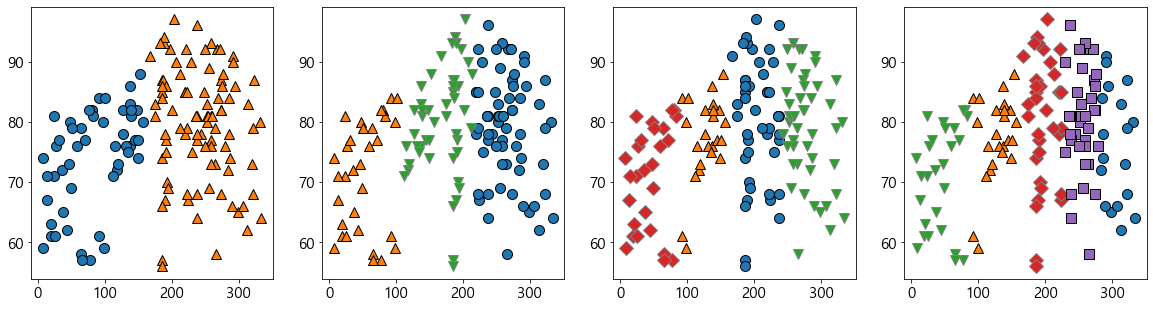

In [18]:
# 같은 데이터라도 k값을 어떻게 할당하느냐에 따라 클러스터링 결과가 달라질 수 있음
fig, axes=plt.subplots(1, 4, figsize=(20,5)) # 1행 4열의 서브 플롯 생성

# 2, 3, 4, 5개의 클러스터로 나눌 경우
idx=0
for k in [2,3,4,5]:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(X)
    lbls=kmeans.labels_
    mglearn.discrete_scatter(X['Solar.R'], X['Temp'], lbls, ax=axes[idx])
    idx+=1